In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import requests
import pandas as pd
from datetime import datetime, timedelta

In [10]:
stream_df = pd.read_csv('/content/drive/MyDrive/DS5230_Project/top_streamers_100.csv')

In [11]:
stream_df.head()

,game_id,id,language,started_at,title,type,user_id,user_name,viewer_count,user_login,game_name,tags,is_mature
0,509658,42534391433,de,2024-04-20T16:57:28Z,FINALE IM E DATE ❤️,live,135177864,SidneyEweka,21197,sidneyeweka,Just Chatting,['Deutsch'],False
1,509658,44061134123,en,2024-04-20T18:07:13Z,UAW W! SQUATTING PHENOMENA? PEACHJARS COMES OV...,live,207813352,HasanAbi,15674,hasanabi,Just Chatting,"['news', 'politics', 'adhd', 'English']",False
2,509658,40563395317,ru,2024-04-20T16:02:14Z,ВИДОСИКИ WW,live,99899949,bratishkinoff,15417,bratishkinoff,Just Chatting,"['Русский', 'братишкин', 'смотрит', 'bratishki...",True
3,509658,40562203973,ru,2024-04-20T09:38:14Z,ДОМАШНИЙ СИЛЬВЕР. ✅ДЕНЬ 1 !domru,live,70075625,SilverName,12090,silvername,Just Chatting,"['Русский', 'Hardcore']",False
4,509658,50924800765,en,2024-04-20T18:02:30Z,MASTER BAKER Episode 4: Tiramisu ft. @caroline...,live,247808909,QTCinderella,11682,qtcinderella,Just Chatting,['English'],False


In [12]:
stream_df.columns

Index(['game_id', 'id', 'language', 'started_at', 'title', 'type', 'user_id',
       'user_name', 'viewer_count', 'user_login', 'game_name', 'tags',
       'is_mature'],
      dtype='object')

In [13]:
stream_df.shape

(8538, 13)

In [14]:
stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538 entries, 0 to 8537
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   game_id       8538 non-null   int64 
 1   id            8538 non-null   int64 
 2   language      8538 non-null   object
 3   started_at    8538 non-null   object
 4   title         8527 non-null   object
 5   type          8538 non-null   object
 6   user_id       8538 non-null   int64 
 7   user_name     8538 non-null   object
 8   viewer_count  8538 non-null   int64 
 9   user_login    8538 non-null   object
 10  game_name     8538 non-null   object
 11  tags          8528 non-null   object
 12  is_mature     8538 non-null   bool  
dtypes: bool(1), int64(4), object(8)
memory usage: 808.9+ KB


In [26]:
# Group by hour and calculate viewership and channel count
stream_df['started_at'] = pd.to_datetime(stream_df['started_at'])

In [27]:
df = stream_df.copy()

In [29]:
df = df.set_index('started_at')

In [74]:
hourly_data = df.groupby('game_name').resample('H').agg({
        'user_id': pd.Series.nunique,  # count unique channels
        'viewer_count': 'sum'  # sum of viewers
    }).rename(columns={'user_id': 'hourly_channels', 'viewer_count': 'hourly_viewership'})

In [92]:
hourly_viewership_df = hourly_data.reset_index()

In [93]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'Just Chatting']

,game_name,started_at,hourly_channels,hourly_viewership
1229,Just Chatting,2024-04-19 12:00:00+00:00,1,5368
1230,Just Chatting,2024-04-19 13:00:00+00:00,0,0
1231,Just Chatting,2024-04-19 14:00:00+00:00,0,0
1232,Just Chatting,2024-04-19 15:00:00+00:00,0,0
1233,Just Chatting,2024-04-19 16:00:00+00:00,1,5530
1234,Just Chatting,2024-04-19 17:00:00+00:00,0,0
1235,Just Chatting,2024-04-19 18:00:00+00:00,0,0
1236,Just Chatting,2024-04-19 19:00:00+00:00,1,2466
1237,Just Chatting,2024-04-19 20:00:00+00:00,0,0
1238,Just Chatting,2024-04-19 21:00:00+00:00,0,0


In [94]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'Just Chatting'].max()


game_name                        Just Chatting
started_at           2024-04-20 19:00:00+00:00
hourly_channels                             24
hourly_viewership                        78346
dtype: object

In [95]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'Just Chatting'].min()


game_name                        Just Chatting
started_at           2024-04-19 12:00:00+00:00
hourly_channels                              0
hourly_viewership                            0
dtype: object

In [96]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'League of Legends']


,game_name,started_at,hourly_channels,hourly_viewership
1309,League of Legends,2024-04-19 09:00:00+00:00,1,340
1310,League of Legends,2024-04-19 10:00:00+00:00,0,0
1311,League of Legends,2024-04-19 11:00:00+00:00,0,0
1312,League of Legends,2024-04-19 12:00:00+00:00,0,0
1313,League of Legends,2024-04-19 13:00:00+00:00,0,0
1314,League of Legends,2024-04-19 14:00:00+00:00,0,0
1315,League of Legends,2024-04-19 15:00:00+00:00,0,0
1316,League of Legends,2024-04-19 16:00:00+00:00,1,172
1317,League of Legends,2024-04-19 17:00:00+00:00,0,0
1318,League of Legends,2024-04-19 18:00:00+00:00,0,0


In [97]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'League of Legends'].max()

game_name                    League of Legends
started_at           2024-04-20 19:00:00+00:00
hourly_channels                             24
hourly_viewership                       108372
dtype: object

In [98]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'League of Legends'].min()

game_name                    League of Legends
started_at           2024-04-19 09:00:00+00:00
hourly_channels                              0
hourly_viewership                            0
dtype: object

In [99]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'Grand Theft Auto V']


# Interpretation
# At 6:00 PM There are 18 channels playing GTA V with the total viewership 19771

,game_name,started_at,hourly_channels,hourly_viewership
1122,Grand Theft Auto V,2024-04-20 07:00:00+00:00,1,486
1123,Grand Theft Auto V,2024-04-20 08:00:00+00:00,2,2211
1124,Grand Theft Auto V,2024-04-20 09:00:00+00:00,2,3994
1125,Grand Theft Auto V,2024-04-20 10:00:00+00:00,2,1690
1126,Grand Theft Auto V,2024-04-20 11:00:00+00:00,4,2742
1127,Grand Theft Auto V,2024-04-20 12:00:00+00:00,7,41598
1128,Grand Theft Auto V,2024-04-20 13:00:00+00:00,12,16737
1129,Grand Theft Auto V,2024-04-20 14:00:00+00:00,6,7542
1130,Grand Theft Auto V,2024-04-20 15:00:00+00:00,10,13145
1131,Grand Theft Auto V,2024-04-20 16:00:00+00:00,11,10429


In [100]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'Grand Theft Auto V'].max()

game_name                   Grand Theft Auto V
started_at           2024-04-20 19:00:00+00:00
hourly_channels                             18
hourly_viewership                        41598
dtype: object

In [101]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'Grand Theft Auto V'].min()

game_name                   Grand Theft Auto V
started_at           2024-04-20 07:00:00+00:00
hourly_channels                              1
hourly_viewership                          486
dtype: object

In [102]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'ARK: Survival Ascended']

,game_name,started_at,hourly_channels,hourly_viewership
0,ARK: Survival Ascended,2024-04-20 06:00:00+00:00,1,4
1,ARK: Survival Ascended,2024-04-20 07:00:00+00:00,1,4
2,ARK: Survival Ascended,2024-04-20 08:00:00+00:00,1,3
3,ARK: Survival Ascended,2024-04-20 09:00:00+00:00,1,985
4,ARK: Survival Ascended,2024-04-20 10:00:00+00:00,1,11
5,ARK: Survival Ascended,2024-04-20 11:00:00+00:00,3,177
6,ARK: Survival Ascended,2024-04-20 12:00:00+00:00,0,0
7,ARK: Survival Ascended,2024-04-20 13:00:00+00:00,2,207
8,ARK: Survival Ascended,2024-04-20 14:00:00+00:00,13,529
9,ARK: Survival Ascended,2024-04-20 15:00:00+00:00,26,2559


In [103]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'ARK: Survival Ascended'].max()

game_name               ARK: Survival Ascended
started_at           2024-04-20 19:00:00+00:00
hourly_channels                             26
hourly_viewership                         2559
dtype: object

In [104]:
hourly_viewership_df[hourly_viewership_df['game_name'] == 'ARK: Survival Ascended'].min()

game_name               ARK: Survival Ascended
started_at           2024-04-20 06:00:00+00:00
hourly_channels                              0
hourly_viewership                            0
dtype: object

In [105]:
hourly_viewership_df.shape

(2715, 4)

In [106]:
for game in hourly_viewership_df['game_name'].unique():
  print(game)

ARK: Survival Ascended
ASMR
Age of Empires II
Albion Online
Always On
Among Us
Anime Squad
Apex Legends
Art
Baldur's Gate 3
Black Desert
Brawl Stars
Brawlhalla
Call of Duty
Call of Duty: Modern Warfare III
Call of Duty: Warzone
Casino
Chess
Counter-Strike
Counter-Strike: Global Offensive
DayZ
Dead by Daylight
Death Must Die
Destiny 2
Dota 2
Dungeon Clawler
EA Sports FC 24
ELDEN RING
EVE Online
Escape from Tarkov
Eve Online
F1 23
FINAL FANTASY XIV ONLINE
Fallout 4
Fallout 76
Fallout: New Vegas
Fortnite
GODDESS OF VICTORY: NIKKE
Games + Demos
Genshin Impact
Geometry Dash
Grand Theft Auto V
Gray Zone Warfare
HELLDIVERS 2
Hearthstone
Honkai: Star Rail
Hunt: Showdown
Just Chatting
Kingdom Come: Deliverance
League of Legends
Lethal Company
Lost Ark
Marvel Snap
Mechabellum
Metin2
Minecraft
Music
NBA 2K24
No Rest for the Wicked
Noita
Old School RuneScape
Overwatch 2
PUBG: BATTLEGROUNDS
Path of Exile
Pools, Hot Tubs, and Beaches
Pummel Party
ROBLOX
Red Dead Redemption 2
Retro
RimWorld
Rise Onli

In [220]:
game_min_var = ""
hour_viewership_df = pd.DataFrame(columns=["timestamp", "game_name", "hourly_channels", "hourly_viewership"])

for game in hourly_viewership_df['game_name'].unique():
    # Filter the DataFrame for the current game
    game_df = hourly_viewership_df[hourly_viewership_df['game_name'] == game]

    # Print the maximum 'started_at' for the game
    max_started_at = game_df['started_at'].max()
    print(game)
    print(max_started_at)

    # Initialize counters
    hourly_channels = 0
    hourly_viewership = 0

    # Filter rows where 'started_at' is on or after "2024-04-20 00:00:00+00:00" and sum up the relevant columns

    hourly_channels = game_df['hourly_channels'].sum()
    hourly_viewership = game_df['hourly_viewership'].sum()

    hour_viewership_df = hour_viewership_df = pd.concat([hour_viewership_df, pd.DataFrame({'timestamp': max_started_at, 'game_name': game, 'hourly_channels': hourly_channels, 'hourly_viewership': hourly_viewership}, index=[0])], ignore_index=True)



ARK: Survival Ascended
2024-04-20 19:00:00+00:00
ASMR
2024-04-20 19:00:00+00:00
Age of Empires II
2024-04-20 19:00:00+00:00
Albion Online
2024-04-20 19:00:00+00:00
Always On
2024-04-20 19:00:00+00:00
Among Us
2024-04-20 19:00:00+00:00
Anime Squad
2024-04-20 19:00:00+00:00
Apex Legends
2024-04-20 19:00:00+00:00
Art
2024-04-20 19:00:00+00:00
Baldur's Gate 3
2024-04-20 19:00:00+00:00
Black Desert
2024-04-20 19:00:00+00:00
Brawl Stars
2024-04-20 19:00:00+00:00
Brawlhalla
2024-04-20 19:00:00+00:00
Call of Duty
2024-04-20 19:00:00+00:00
Call of Duty: Modern Warfare III
2024-04-20 19:00:00+00:00
Call of Duty: Warzone
2024-04-20 19:00:00+00:00
Casino
2024-04-20 19:00:00+00:00
Chess
2024-04-20 19:00:00+00:00
Counter-Strike
2024-04-20 19:00:00+00:00
Counter-Strike: Global Offensive
2024-04-20 17:00:00+00:00
DayZ
2024-04-20 19:00:00+00:00
Dead by Daylight
2024-04-20 19:00:00+00:00
Death Must Die
2024-04-20 19:00:00+00:00
Destiny 2
2024-04-20 19:00:00+00:00
Dota 2
2024-04-20 19:00:00+00:00
Dungeon

In [221]:
hour_viewership_df[hour_viewership_df['hourly_viewership'] == hour_viewership_df['hourly_viewership'].max()]

,timestamp,game_name,hourly_channels,hourly_viewership
49,2024-04-20 19:00:00+00:00,League of Legends,100,363402


In [222]:
hour_viewership_df[hour_viewership_df['hourly_viewership'] == hour_viewership_df['hourly_viewership'].min()]

,timestamp,game_name,hourly_channels,hourly_viewership
30,2024-04-20 12:00:00+00:00,Eve Online,1,1


In [117]:
# hour_viewership_df.to_csv('/content/drive/MyDrive/DS5230_Project/hourly_viewership.csv')

In [223]:
hour_viewership_df.head()

,timestamp,game_name,hourly_channels,hourly_viewership
0,2024-04-20 19:00:00+00:00,ARK: Survival Ascended,99,5560
1,2024-04-20 19:00:00+00:00,ASMR,98,10936
2,2024-04-20 19:00:00+00:00,Age of Empires II,77,4882
3,2024-04-20 19:00:00+00:00,Albion Online,100,4355
4,2024-04-20 19:00:00+00:00,Always On,100,5524


In [225]:
sorted_df = hour_viewership_df.sort_values(by=['hourly_channels', 'hourly_viewership'], ascending=[False, False])

# Select the top 5 games
top_games = sorted_df.head()

top_games

,timestamp,game_name,hourly_channels,hourly_viewership
49,2024-04-20 19:00:00+00:00,League of Legends,100,363402
36,2024-04-20 19:00:00+00:00,Fortnite,100,170222
41,2024-04-20 19:00:00+00:00,Grand Theft Auto V,100,153920
61,2024-04-20 19:00:00+00:00,Overwatch 2,100,49022
15,2024-04-20 19:00:00+00:00,Call of Duty: Warzone,100,33271


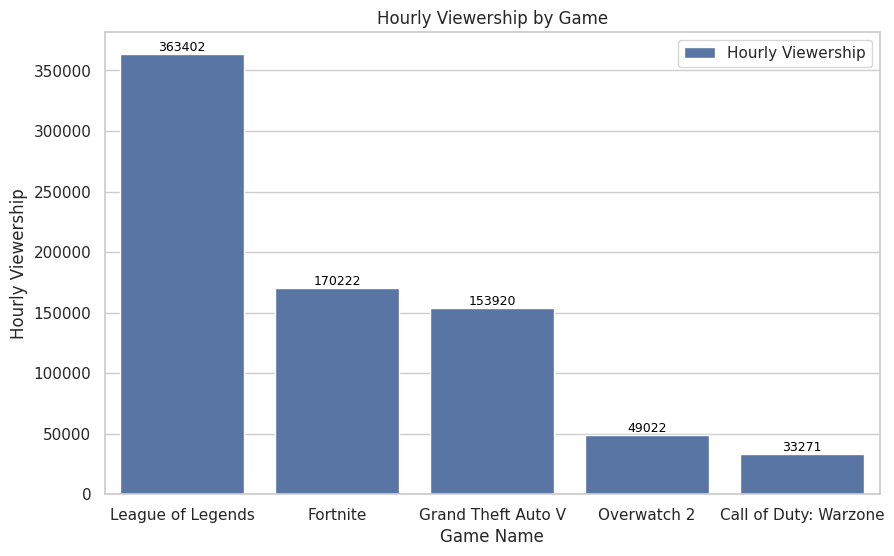

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for 'hourly_channels'
barplot = sns.barplot(x='game_name', y='hourly_viewership', data=top_games, color='b', ax=ax1, label='Hourly Viewership')


# Adding labels to each bar
for bar in barplot.patches:
    # The text annotation for each bar
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', color='black', fontsize=9)

# Titles and labels
ax1.set_title('Hourly Viewership by Game')
ax1.set_xlabel('Game Name')
ax1.set_ylabel('Hourly Viewership')

# Show the plot
plt.legend()
plt.show()


In [229]:
# Initialize a list to store data dictionaries
aggregated_data = []

for game in hourly_viewership_df['game_name'].unique():
    # Filter the DataFrame for the current game
    game_df = hourly_viewership_df[hourly_viewership_df['game_name'] == game]

    # Maximum 'started_at' for the game
    max_started_at = game_df['started_at'].max()

    # Filter rows where 'started_at' is on or after "2024-04-18 00:00:00+00:00"
    after_date_df = game_df[game_df['started_at'] >= "2024-04-18 00:00:00+00:00"]

    # Sum up the relevant columns
    hourly_channels = after_date_df['hourly_channels'].sum()
    hourly_viewership = after_date_df['hourly_viewership'].sum()

    # Calculate average viewership safely
    if after_date_df.shape[0] > 0:
        average_viewership = round(hourly_viewership / after_date_df.shape[0], 2)
    else:
        average_viewership = 0  # Avoid division by zero

    # Append the data dictionary to the list
    aggregated_data.append({
        'timestamp': max_started_at,
        'game_name': game,
        'hourly_channels': hourly_channels,
        'hourly_viewership': hourly_viewership,
        'average_viewership': average_viewership
    })

# Convert the list of dictionaries to a DataFrame
viewership_df = pd.DataFrame(aggregated_data)

In [230]:
viewership_df.head()

,timestamp,game_name,hourly_channels,hourly_viewership,average_viewership
0,2024-04-20 19:00:00+00:00,ARK: Survival Ascended,99,5560,397.14
1,2024-04-20 19:00:00+00:00,ASMR,98,10936,227.83
2,2024-04-20 19:00:00+00:00,Age of Empires II,77,4882,325.47
3,2024-04-20 19:00:00+00:00,Albion Online,100,4355,140.48
4,2024-04-20 19:00:00+00:00,Always On,100,5524,115.08


In [231]:
sorted_df = viewership_df.sort_values(by=['hourly_channels', 'average_viewership'], ascending=[False, False])

# Select the top 5 games
top_games = sorted_df.head()

print(top_games)

                   timestamp              game_name  hourly_channels  \
41 2024-04-20 19:00:00+00:00     Grand Theft Auto V              100   
49 2024-04-20 19:00:00+00:00      League of Legends              100   
36 2024-04-20 19:00:00+00:00               Fortnite              100   
15 2024-04-20 19:00:00+00:00  Call of Duty: Warzone              100   
61 2024-04-20 19:00:00+00:00            Overwatch 2              100   

    hourly_viewership  average_viewership  
41             153920            11840.00  
49             363402            10382.91  
36             170222             7737.36  
15              33271             1147.28  
61              49022             1043.02  


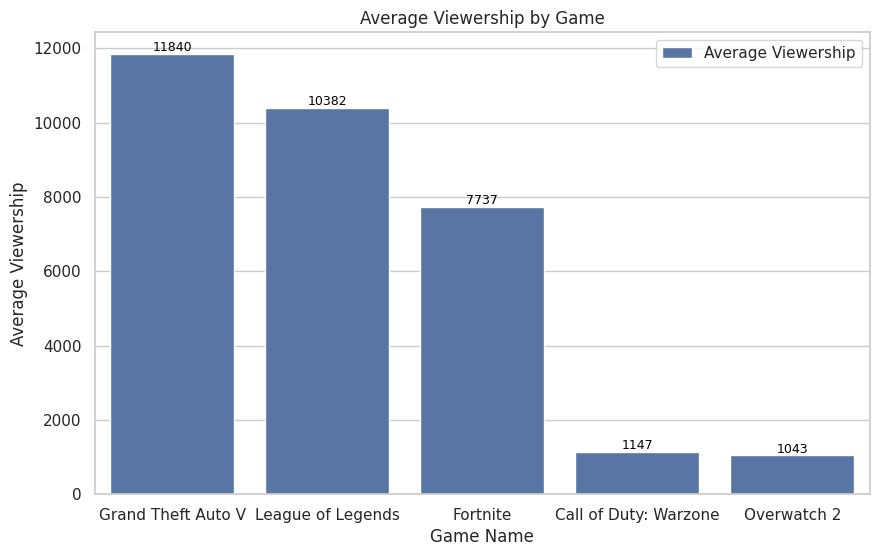

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for 'hourly_channels'
barplot = sns.barplot(x='game_name', y='average_viewership', data=top_games, color='b', ax=ax1, label='Average Viewership')


# Adding labels to each bar
for bar in barplot.patches:
    # The text annotation for each bar
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', color='black', fontsize=9)

# Titles and labels
ax1.set_title('Average Viewership by Game')
ax1.set_xlabel('Game Name')
ax1.set_ylabel('Average Viewership')

# Show the plot
plt.legend()
plt.show()

In [233]:
# Initialize an empty DataFrame for overall trends
overall_trend = pd.DataFrame()

# Loop through each unique game in the DataFrame
for game in hourly_viewership_df['game_name'].unique():
    # Filter the DataFrame for the current game and group by 'started_at'
    df = hourly_viewership_df[hourly_viewership_df["game_name"] == game].groupby('started_at').agg({
        'hourly_channels': 'sum',
        'hourly_viewership': 'sum'
    })
    df["channels_change"] = df['hourly_channels'].diff()
    df["viewership_change"] = df['hourly_viewership'].diff()
    df["game_name"] = game
    df = df.reset_index()
    overall_trend = pd.concat([overall_trend, df])

In [234]:
overall_trend.rename(columns={'started_at': 'timestamp'}, inplace=True)

In [236]:
overall_trend.head()

,timestamp,hourly_channels,hourly_viewership,channels_change,viewership_change,game_name
0,2024-04-20 06:00:00+00:00,1,4,NaN,NaN,ARK: Survival Ascended
1,2024-04-20 07:00:00+00:00,1,4,0.0,0.0,ARK: Survival Ascended
2,2024-04-20 08:00:00+00:00,1,3,0.0,-1.0,ARK: Survival Ascended
3,2024-04-20 09:00:00+00:00,1,985,0.0,982.0,ARK: Survival Ascended
4,2024-04-20 10:00:00+00:00,1,11,0.0,-974.0,ARK: Survival Ascended


In [237]:
overall_trend.to_csv('/content/drive/MyDrive/DS5230_Project/overall_trend.csv', index = False)

In [239]:
hourly_viewership_df.head()

,game_name,started_at,hourly_channels,hourly_viewership,timestamp,views_per_channel
0,ARK: Survival Ascended,2024-04-20 06:00:00+00:00,1,4,2024-04-20 06:00:00+00:00,4.0
1,ARK: Survival Ascended,2024-04-20 07:00:00+00:00,1,4,2024-04-20 07:00:00+00:00,4.0
2,ARK: Survival Ascended,2024-04-20 08:00:00+00:00,1,3,2024-04-20 08:00:00+00:00,3.0
3,ARK: Survival Ascended,2024-04-20 09:00:00+00:00,1,985,2024-04-20 09:00:00+00:00,985.0
4,ARK: Survival Ascended,2024-04-20 10:00:00+00:00,1,11,2024-04-20 10:00:00+00:00,11.0


In [240]:
hourly_viewership_df.drop(columns = ['timestamp'], inplace = True)

In [242]:
hourly_viewership_df.rename(columns={'started_at': 'timestamp'}, inplace=True)

In [243]:
hourly_viewership_df

,game_name,timestamp,hourly_channels,hourly_viewership,views_per_channel
0,ARK: Survival Ascended,2024-04-20 06:00:00+00:00,1,4,4.000000
1,ARK: Survival Ascended,2024-04-20 07:00:00+00:00,1,4,4.000000
2,ARK: Survival Ascended,2024-04-20 08:00:00+00:00,1,3,3.000000
3,ARK: Survival Ascended,2024-04-20 09:00:00+00:00,1,985,985.000000
4,ARK: Survival Ascended,2024-04-20 10:00:00+00:00,1,11,11.000000
...,...,...,...,...,...
2710,iRacing,2024-04-20 15:00:00+00:00,5,723,144.600000
2711,iRacing,2024-04-20 16:00:00+00:00,26,2026,77.923077
2712,iRacing,2024-04-20 17:00:00+00:00,36,529,14.694444
2713,iRacing,2024-04-20 18:00:00+00:00,17,523,30.764706


In [246]:
hourly_viewership_df['views_per_channel'] = round(hourly_viewership_df['hourly_viewership']/hourly_viewership_df['hourly_channels'], 3)

In [247]:
hourly_viewership_df

,game_name,timestamp,hourly_channels,hourly_viewership,views_per_channel
0,ARK: Survival Ascended,2024-04-20 06:00:00+00:00,1,4,4.000
1,ARK: Survival Ascended,2024-04-20 07:00:00+00:00,1,4,4.000
2,ARK: Survival Ascended,2024-04-20 08:00:00+00:00,1,3,3.000
3,ARK: Survival Ascended,2024-04-20 09:00:00+00:00,1,985,985.000
4,ARK: Survival Ascended,2024-04-20 10:00:00+00:00,1,11,11.000
...,...,...,...,...,...
2710,iRacing,2024-04-20 15:00:00+00:00,5,723,144.600
2711,iRacing,2024-04-20 16:00:00+00:00,26,2026,77.923
2712,iRacing,2024-04-20 17:00:00+00:00,36,529,14.694
2713,iRacing,2024-04-20 18:00:00+00:00,17,523,30.765


In [248]:
trend_views = hourly_viewership_df.groupby('game_name').mean().sort_values(by = 'hourly_viewership', ascending = False)

In [249]:
trend_views

,timestamp,hourly_channels,hourly_viewership,views_per_channel
game_name,,,,
Grand Theft Auto V,2024-04-20 13:00:00+00:00,7.692308,11840.000000,1501.593231
League of Legends,2024-04-20 02:00:00+00:00,2.857143,10382.914286,8516.149625
Just Chatting,2024-04-20 03:30:00+00:00,2.843750,8824.187500,3485.346412
Fortnite,2024-04-20 08:30:00+00:00,4.545455,7737.363636,1324.925000
Dungeon Clawler,2024-04-20 16:30:00+00:00,1.000000,6747.000000,6747.000000
...,...,...,...,...
Call of Duty: Modern Warfare III,2024-04-19 22:30:00+00:00,2.285714,94.000000,42.702125
ROBLOX,2024-04-19 22:30:00+00:00,2.380952,66.809524,26.106235
Counter-Strike: Global Offensive,2024-04-20 12:00:00+00:00,0.181818,64.636364,355.500000


<ipython-input-250-a0a9645ccdec>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


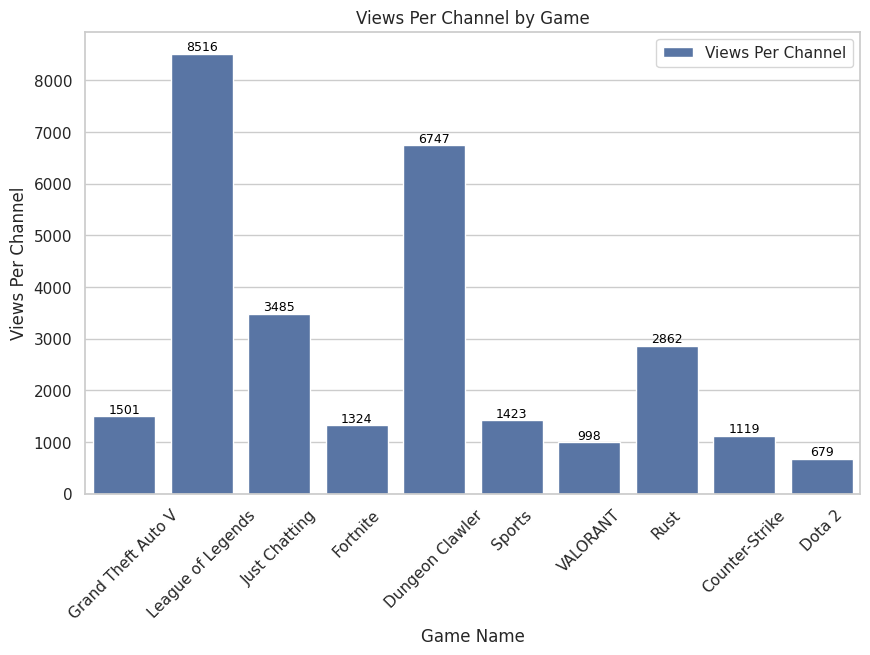

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for 'hourly_channels'
barplot = sns.barplot(x='game_name', y='views_per_channel', data=trend_views.head(10), color='b', ax=ax1, label='Views Per Channel')


# Adding labels to each bar
for bar in barplot.patches:
    # The text annotation for each bar
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', color='black', fontsize=9)

# Titles and labels
ax1.set_title('Views Per Channel by Game')
ax1.set_xlabel('Game Name')
# Rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Views Per Channel')

# Show the plot
plt.legend()
plt.show()

In [251]:
hour_df = hourly_viewership_df.copy()

In [253]:
hour_df.to_csv('/content/drive/MyDrive/DS5230_Project/hourly_viewership.csv', index = False)

<Axes: xlabel='timestamp'>

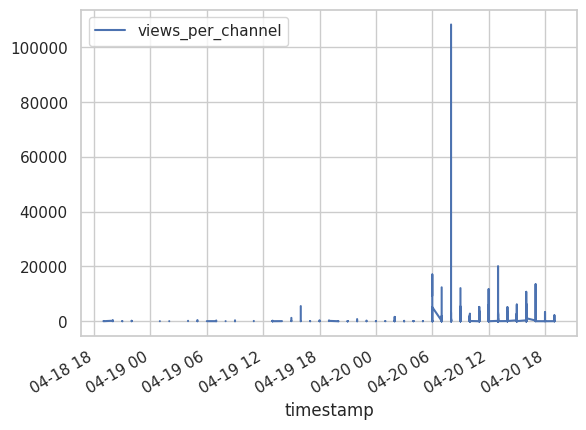

In [254]:
hour_df.plot.line(x = 'timestamp', y = 'views_per_channel')

<Axes: xlabel='timestamp'>

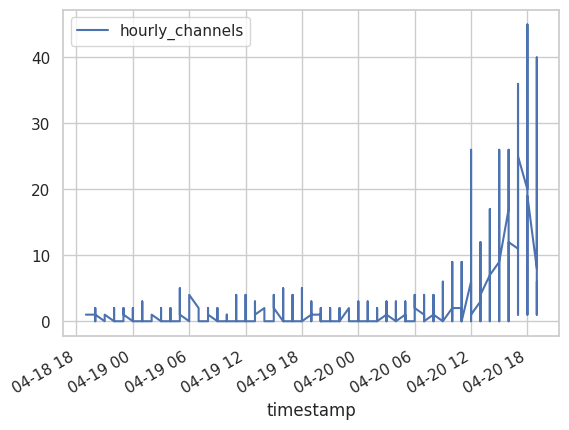

In [255]:
hour_df.plot.line(x = 'timestamp', y = 'hourly_channels')

<Axes: xlabel='timestamp'>

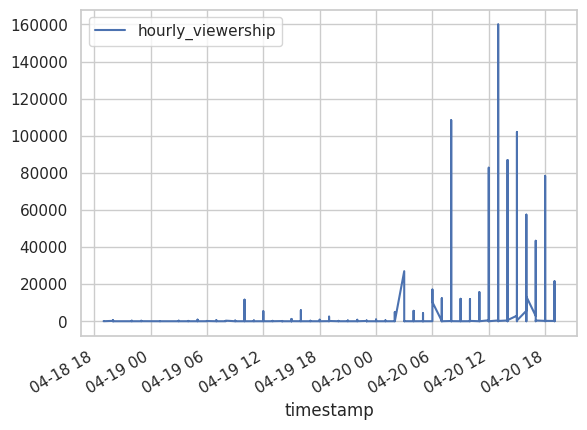

In [256]:
hour_df.plot.line(x = 'timestamp', y = 'hourly_viewership')

In [258]:
hour_df['views_per_channel'].fillna(0, inplace=True) #impute value with 0

In [259]:
hour_df.to_csv('/content/drive/MyDrive/DS5230_Project/hourly_viewership.csv', index = False)